In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    
    Dense(128, activation='relu'),
    
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.3425 - loss: 1.7946 - val_accuracy: 0.5534 - val_loss: 1.2736
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5784 - loss: 1.1822 - val_accuracy: 0.6342 - val_loss: 1.0537
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6610 - loss: 0.9674 - val_accuracy: 0.6809 - val_loss: 0.9130
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7045 - loss: 0.8399 - val_accuracy: 0.6965 - val_loss: 0.8785
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.7467 - loss: 0.7249 - val_accuracy: 0.7122 - val_loss: 0.8397
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7756 - loss: 0.6397 - val_accuracy: 0.7165 - val_loss: 0.8688
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7976 - loss: 0.5762 - val_accuracy: 0.7231 - val_loss: 0.8305
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8224 - loss: 0.5062 - 

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test_loss: {test_loss}, test_accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7363 - loss: 0.8782
Test_loss: 0.9045030474662781, test_accuracy: 0.7297999858856201


In [11]:
import numpy as np
predictions = model.predict(x_test)
predicted_class = np.argmax(predictions[0])
print(f'predicted_class: {predicted_class}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
predicted_class: 5


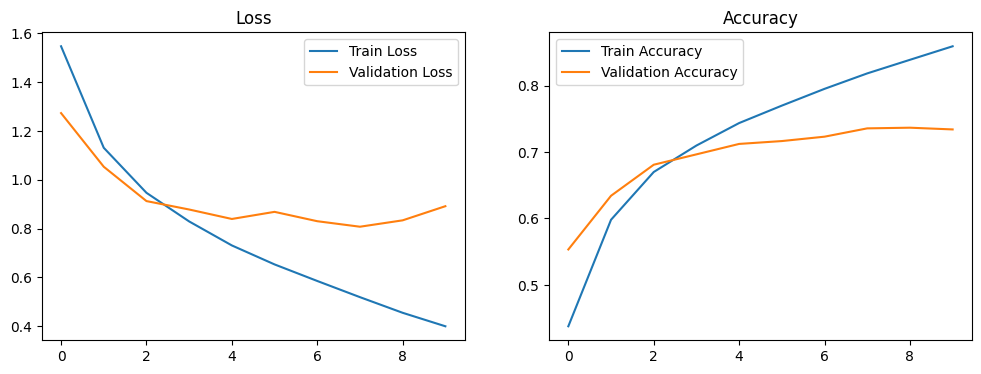

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()
